#  Imports and Read in One Map

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc

In [2]:
from projections import transform_map

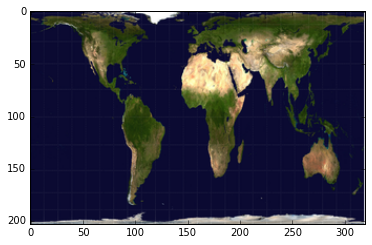

In [10]:
map1 = misc.imread('/Users/pfoley/map_projections/input_images/Gall-peters_smallest.png')
map2 = misc.imread('/Users/pfoley/map_projections/input_images/plate_carre_1.jpg')
plt.imshow(map1)

#  Example Transformation

In [11]:
from projections import rotationFromXYZ

In [12]:
rot_mat = rotationFromXYZ(np.pi/8, np.pi/5, -np.pi/3)

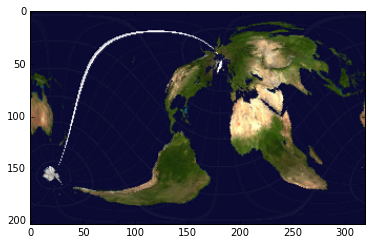

In [13]:
map1a = transform_map(map1, rot_mat, debug = False)

Oops - this input image is actually a gall peters projection.  We want to output using plate carre.

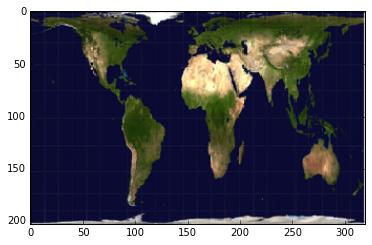

In [15]:
map1b = transform_map(map1, rotationFromXYZ(0.0, 0.0, 0.0), 
		     in_projection='gallpeters', out_projection='gallpeters', debug=False)

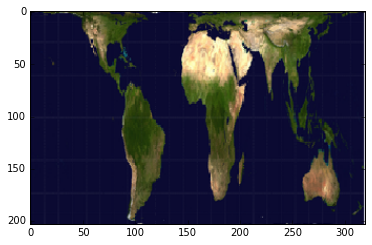

In [16]:
map4 = transform_map(map1, rotationFromXYZ(0.0, 0.0, 0.0), 
		     in_projection='gallpeters', out_projection='platecarre', debug=False)

Uh oh, I have a bug.  

Let's see if the bug is localized to gall peters code.  

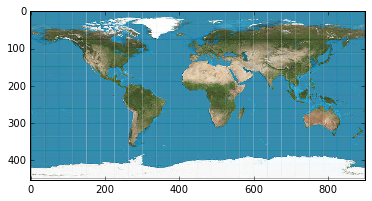

In [17]:
plt.imshow(map2)

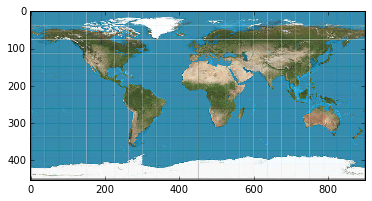

In [19]:
map2b = transform_map(map2, rotationFromXYZ(0.0, 0.0, 0.0), 
        in_projection='platecarre', out_projection='platecarre', debug=False)

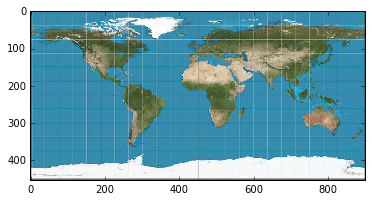

In [20]:
map2c = transform_map(map2b, rotationFromXYZ(0.0, 0.0, 0.0), 
        in_projection='platecarre', out_projection='platecarre', debug=False)

Great!  it still looks OK.  But there's something wrong with my gall peters code. 

##  New Rotation Code

I just finished some code to get rotations to place two locations as front and center.  Let's try it out.

First let's do SF to Melbourne.

In [ ]:
37.7749° N, 122.4194° W
37.8136° S, 144.9631° E

In [55]:
san_francisco = (-122.4194, 37.7749)
melbourne = (144.9631, -37.8136)

In [56]:
san_francisco = (d * np.pi / 180.0 for d in san_francisco)
melbourne = (d * np.pi / 180.0 for d in melbourne)

In [38]:
from projections import rotationFromTwoLocations

In [57]:
sf_to_melbourne = rotationFromTwoLocations(melbourne, san_francisco)

In [47]:
sf_to_melbourne

matrix([[-0.54180308, -0.56719719,  0.62027152],
        [-0.43003455, -0.44700115, -0.78438527],
        [-0.72216321,  0.69172054,  0.00172779]])

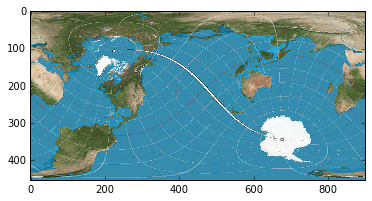

In [58]:
map3 = transform_map(map2,
                     sf_to_melbourne.T,
                     in_projection='platecarre',
                     out_projection='platecarre',
                     debug=False)

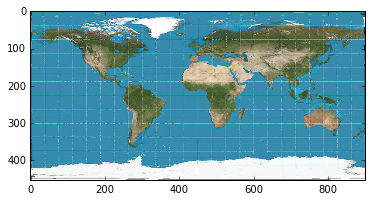

In [42]:
map3back = transform_map(map3,
                     sf_to_melbourne.T,
                     in_projection='platecarre',
                     out_projection='platecarre',
                     debug=False)

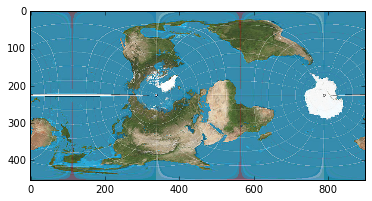

In [43]:
map_debug = transform_map(map2,
                     rotationFromTwoLocations(
                         (0.0, 0.0), (np.pi/2, 0.0)),
                     in_projection='platecarre',
                     out_projection='platecarre',
                     debug=False)

Now let's use a large plate carre image.

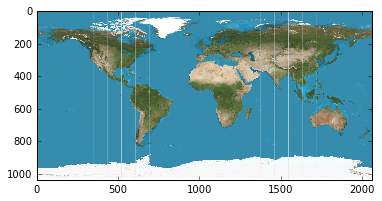

In [59]:
map_large = misc.imread('/Users/pfoley/map_projections/input_images/large_plate_carre.jpg')
plt.imshow(map_large)

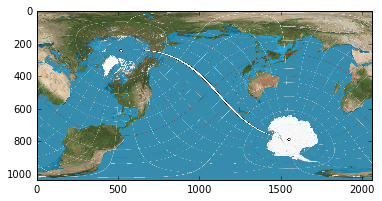

In [60]:
large_sf_to_melbourne = transform_map(map_large,
                     sf_to_melbourne.T,
                     in_projection='platecarre',
                     out_projection='platecarre',
                     debug=False)

In [61]:
?misc.imsave

In [63]:
misc.imsave('/Users/pfoley/large_sf_to_melbourne.png', large_sf_to_melbourne)

In [64]:
large_sat = misc.imread('/Users/pfoley/map_projections/input_images/sat_earth_large_plate_carre.jpg')

/usr/local/lib/python2.7/site-packages/PIL/Image.py:2224: DecompressionBombWarning: Image size (117136818 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning)


In [66]:
large_lights = misc.imread('/Users/pfoley/map_projections/input_images/earth_lights_lrg_plate_carre.jpg')

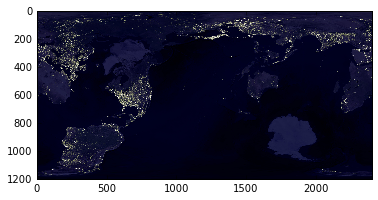

In [67]:
sf2m_sat = transform_map(large_sat,
                     sf_to_melbourne.T,
                     in_projection='platecarre',
                     out_projection='platecarre',
                     debug=False)
sf2m_lights = transform_map(large_lights,
                     sf_to_melbourne.T,
                     in_projection='platecarre',
                     out_projection='platecarre',
                     debug=False)

misc.imsave('/Users/pfoley/sf2melbourne_sat.png', sf2m_sat)
misc.imsave('/Users/pfoley/sf2melbourne_lights.png', sf2m_lights)